In [806]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from datetime import datetime
import yfinance as yf
import statsmodels.stats.api as sms
import warnings
warnings.filterwarnings("ignore")
from statsmodels.discrete.discrete_model import Logit, Probit
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score,precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedShuffleSplit
from statsmodels.tools.tools import add_constant
def evaluate_model(df, target_column_name, fitted_model, y_test, X_test, threshold_ratio=None, print_=True):
    if threshold_ratio==None:
        threshold_ratio = df[target_column_name].mean()
    y_pred_prob = fitted_model.predict(X_test)
    y_pred = np.where(y_pred_prob > threshold_ratio, 1, 0)
    conf_matrix = confusion_matrix(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    if print_:
        print("Confusion Matrix:")
        print(conf_matrix)
        print("\nROC AUC score:", roc_auc) 
        print("\nAccuracy Score:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1 Score:", f1)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
    return (precision, recall, conf_matrix)
def get_dataset(df, exoglist, endogstr, ratio=0.2, random=42):
    X = df[exoglist] 
    y = df[endogstr]    
    sss = StratifiedShuffleSplit(n_splits=1, test_size=ratio, random_state=random)
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    return (X_train, y_train, X_test, y_test)
from statsmodels.miscmodels.ordinal_model import OrderedModel
        

In [4]:
df = pd.read_excel("Retail_Credit_data.xlsx")

In [6]:
df.columns

Index(['Agmt No', 'Contract Status', 'Start_Date', 'AGE', 'NOOFDEPE',
       'MTHINCTH', 'SALDATFR', 'TENORYR', 'DWNPMFR', 'PROFBUS', 'QUALHSC',
       'QUAL_PG', 'SEXCODE', 'FULLPDC', 'FRICODE', 'WASHCODE', 'Region',
       'Branch', 'DefaulterFlag', 'DefaulterType', 'DATASET'],
      dtype='object')

<Axes: >

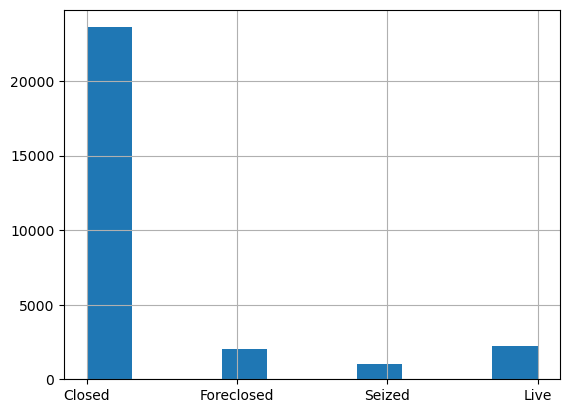

In [7]:
df["Contract Status"].hist()

In [69]:
df["contract_closed"] = [1 if i=="Closed" else 0 for i in df["Contract Status"]]
df["contract_forclosed"] = [1 if i=="Foreclosed" else 0 for i in df["Contract Status"]]
df["contract_seized"] = [1 if i=="Seized" else 0 for i in df["Contract Status"]]
df["contract_live"] = [1 if i=="Live" else 0 for i in df["Contract Status"]]



<Axes: >

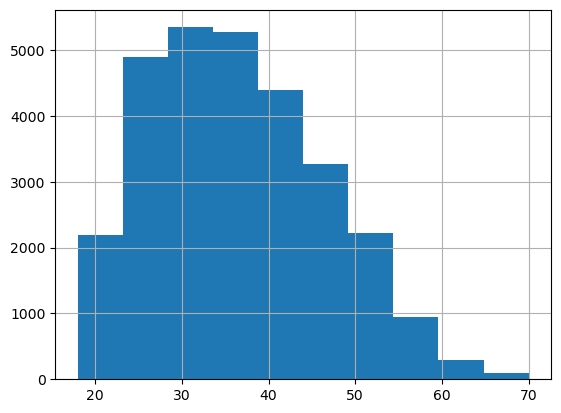

In [9]:
df["AGE"].hist()

<Axes: >

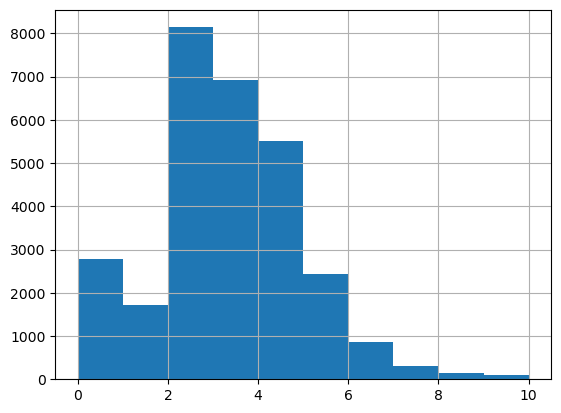

In [10]:
df["NOOFDEPE"].hist()

<Axes: >

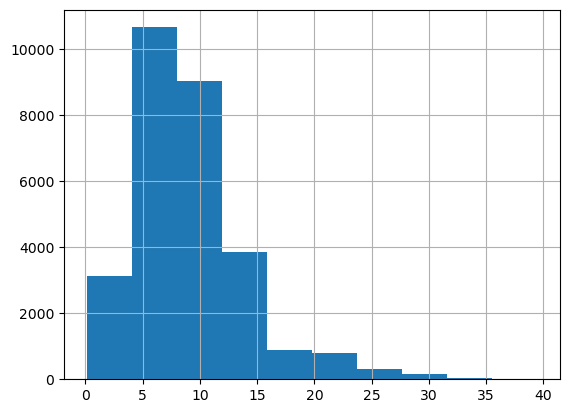

In [12]:
df["MTHINCTH"].hist()

<Axes: >

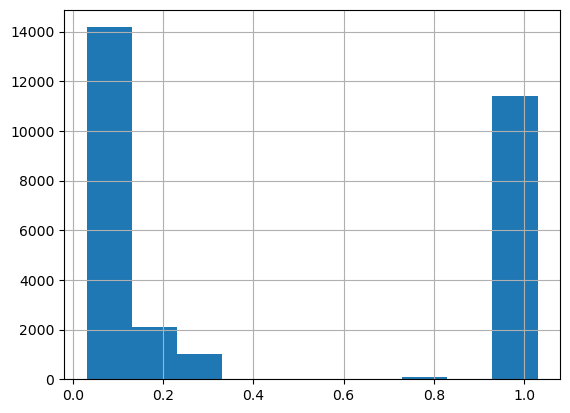

In [13]:
df["SALDATFR"].hist()

<Axes: >

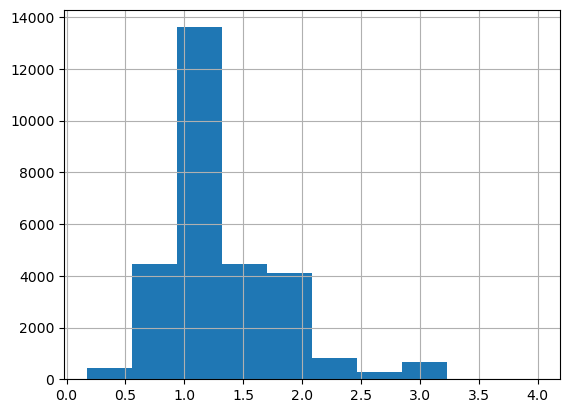

In [14]:
df["TENORYR"].hist()

<Axes: >

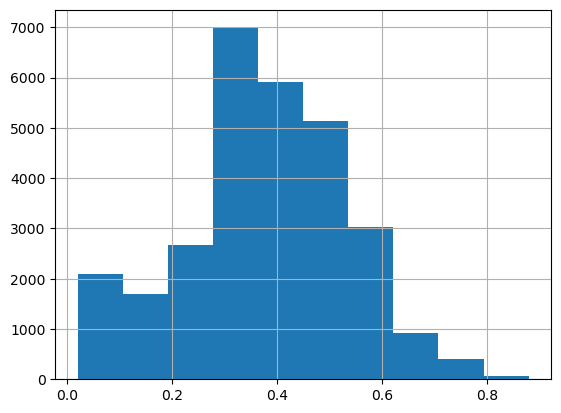

In [15]:
df["DWNPMFR"].hist()

<Axes: >

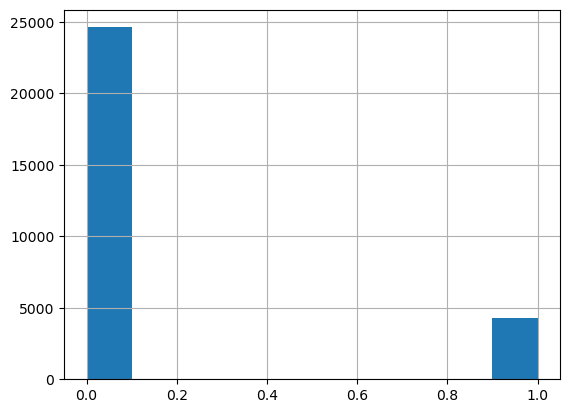

In [16]:
df["PROFBUS"].hist()

<Axes: >

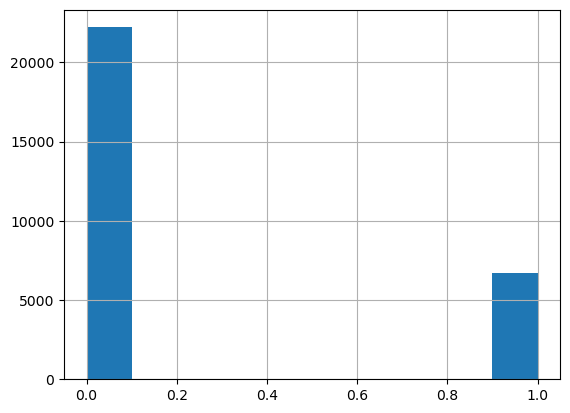

In [27]:
df["QUALHSC"].hist()

<Axes: >

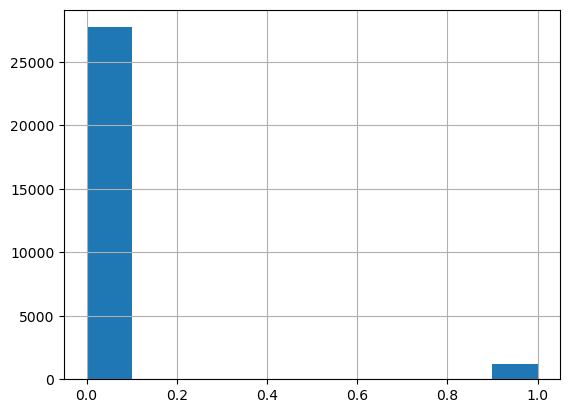

In [17]:
df["QUAL_PG"].hist()

<Axes: >

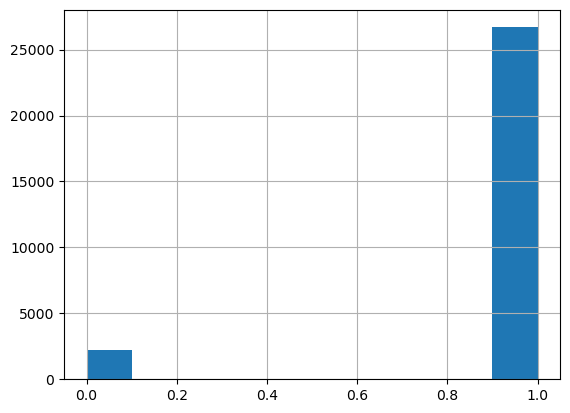

In [18]:
df["SEXCODE"].hist()

<Axes: >

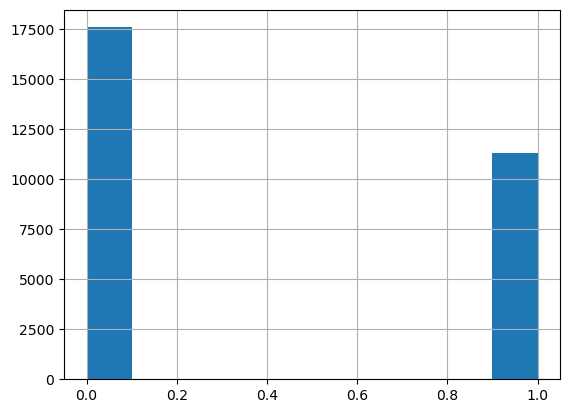

In [19]:
df["FULLPDC"].hist()

<Axes: >

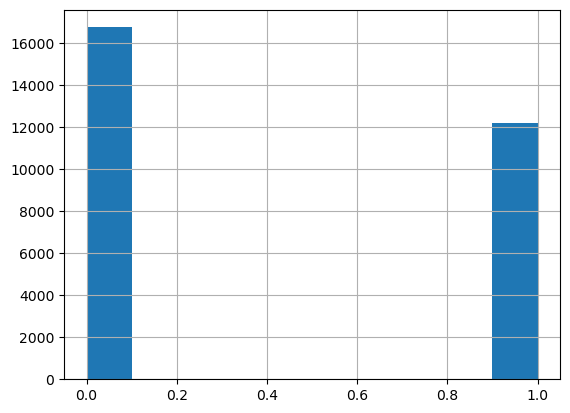

In [20]:
df["FRICODE"].hist()

<Axes: >

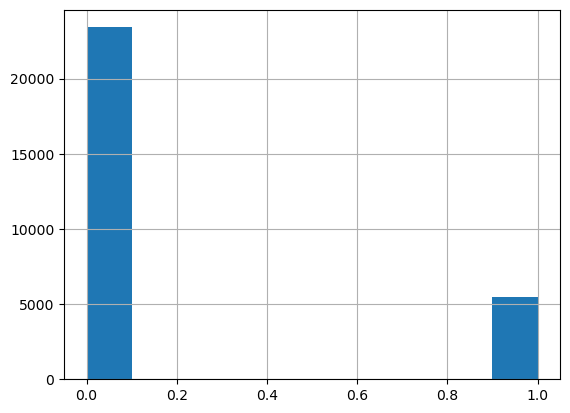

In [21]:
df["WASHCODE"].hist()

<Axes: >

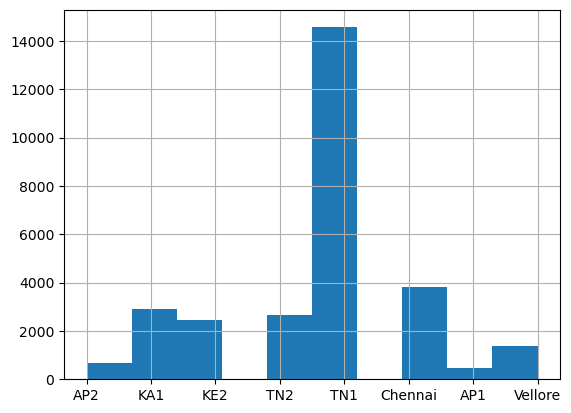

In [22]:
df["Region"].hist()

In [37]:
df["region_ap2"] = [1 if i=="AP2" else 0 for i in df["Region"]]
df["region_ka1"] = [1 if i=="KA1" else 0 for i in df["Region"]]
df["region_ke2"] = [1 if i=="KE2" else 0 for i in df["Region"]]
df["region_tn2"] = [1 if i=="TN2" else 0 for i in df["Region"]]
df["region_tn1"] = [1 if i=="TN1" else 0 for i in df["Region"]]
df["region_chennai"] = [1 if i=="Chennai" else 0 for i in df["Region"]]
df["region_ap1"] = [1 if i=="AP1" else 0 for i in df["Region"]]
df["region_vellore"] = [1 if i=="Vellore" else 0 for i in df["Region"]]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Vizag'),
  Text(1, 0, 'Vijayawada'),
  Text(2, 0, 'Bangalore'),
  Text(3, 0, 'Ernakulam'),
  Text(4, 0, 'Coimbattore'),
  Text(5, 0, 'Kumbakonam'),
  Text(6, 0, 'Chennai'),
  Text(7, 0, 'Madurai'),
  Text(8, 0, 'Pondy'),
  Text(9, 0, 'Salem'),
  Text(10, 0, 'Tiruchy'),
  Text(11, 0, 'Tirupathi'),
  Text(12, 0, 'Vellore'),
  Text(13, 0, 'Tirunelvelli')])

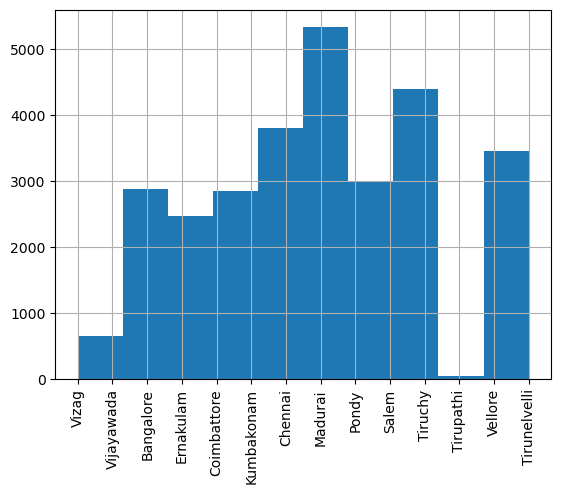

In [26]:
df["Branch"].hist()
plt.xticks(rotation=90)

In [39]:
df["branch_vizag"] = [1 if i=="Vizag" else 0 for i in df["Branch"]]
df["branch_vijayawada"] = [1 if i=="Vijayawada" else 0 for i in df["Branch"]]
df["branch_bangalore"] = [1 if i=="Bangalore" else 0 for i in df["Branch"]]
df["branch_ernakulam"] = [1 if i=="Ernakulam" else 0 for i in df["Branch"]]
df["branch_coimbattore"] = [1 if i=="Coimbattore" else 0 for i in df["Branch"]]
df["branch_kumbakonam"] = [1 if i=="Kumbakonam" else 0 for i in df["Branch"]]
df["branch_chennai"] = [1 if i=="Chennai" else 0 for i in df["Branch"]]
df["branch_madurai"] = [1 if i=="Madurai" else 0 for i in df["Branch"]]
df["branch_pondy"] = [1 if i=="Pondy" else 0 for i in df["Branch"]]
df["branch_salem"] = [1 if i=="Salem" else 0 for i in df["Branch"]]
df["branch_tiruchy"] = [1 if i=="Tiruchy" else 0 for i in df["Branch"]]
df["branch_tirupathi"] = [1 if i=="Tirupathi" else 0 for i in df["Branch"]]
df["branch_vellore"] = [1 if i=="Vellore" else 0 for i in df["Branch"]]
df["branch_tirunelvelli"] = [1 if i=="Tirunelvelli" else 0 for i in df["Branch"]]


<Axes: >

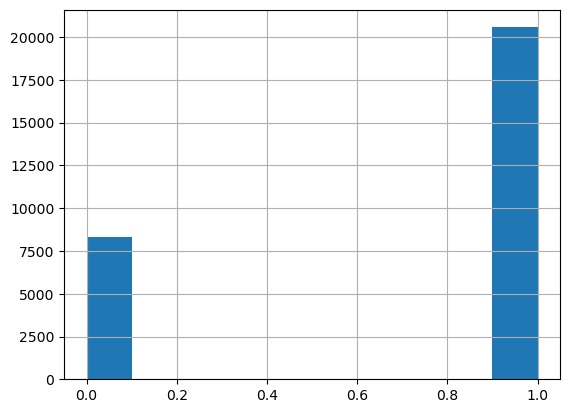

In [24]:
df["DefaulterFlag"].hist()

<Axes: >

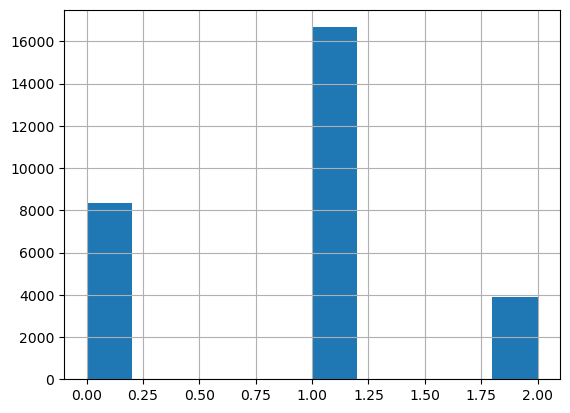

In [25]:
df["DefaulterType"].hist()

In [42]:
df["unknown_start_date"] = [1 if i=="unknown" else 0 for i in df["Start_Date"].fillna("unknown")]


In [45]:
df.isnull().sum()

Agmt No                   0
Contract Status           0
Start_Date             3300
AGE                       0
NOOFDEPE                  0
MTHINCTH                  0
SALDATFR                  0
TENORYR                   0
DWNPMFR                   0
PROFBUS                   0
QUALHSC                   0
QUAL_PG                   0
SEXCODE                   0
FULLPDC                   0
FRICODE                   0
WASHCODE                  0
Region                    0
Branch                    0
DefaulterFlag             0
DefaulterType             0
DATASET                   0
contract_closed           0
contract_forclosed        0
contract_seized           0
contract_live             0
region_ap2                0
region_ka1                0
region_ke2                0
region_tn2                0
region_tn1                0
region_chennai            0
region_ap1                0
region_vellore            0
branch_vizag              0
branch_vijayawada         0
branch_bangalore    

In [70]:
df.describe()

,AGE,NOOFDEPE,MTHINCTH,SALDATFR,TENORYR,DWNPMFR,PROFBUS,QUALHSC,QUAL_PG,SEXCODE,...,branch_kumbakonam,branch_chennai,branch_madurai,branch_pondy,branch_salem,branch_tiruchy,branch_tirupathi,branch_vellore,branch_tirunelvelli,unknown_start_date
count,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,...,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000,28906.000000
mean,36.439667,2.849581,8.935104,0.440023,1.283612,0.376169,0.148412,0.231751,0.040372,0.923338,...,0.006158,0.131461,0.184598,0.038642,0.064692,0.152391,0.001661,0.062098,0.057497,0.114163
std,9.816009,1.614820,4.811211,0.461376,0.519310,0.155939,0.355514,0.421958,0.196834,0.266059,...,0.078232,0.337909,0.387978,0.192745,0.245987,0.359405,0.040717,0.241337,0.232793,0.318015
min,18.000000,0.000000,0.100000,0.030000,0.170000,0.020000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,2.000000,5.200000,0.030000,1.000000,0.290000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,3.000000,8.000000,0.170000,1.000000,0.380000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,4.000000,10.653000,1.000000,1.500000,0.480000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,70.000000,10.000000,39.500000,1.030000,4.000000,0.880000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [279]:
df["wash&frig"] = df["WASHCODE"]*df["FRICODE"]
df["income>mean"] = [1 if i>df["MTHINCTH"].mean() else 0 for i in df["MTHINCTH"]]
df["income>80%"] = [1 if i>df["MTHINCTH"].quantile(0.8) else 0 for i in df["MTHINCTH"]]
df["income<20%"] = [1 if i<df["MTHINCTH"].quantile(0.2) else 0 for i in df["MTHINCTH"]]


In [492]:
df["MTHINCTH"].quantile(0.6)

9.0

In [288]:
df["income>90%"] = [1 if i>df["MTHINCTH"].quantile(0.9) else 0 for i in df["MTHINCTH"]]
df["income>95%"] = [1 if i>df["MTHINCTH"].quantile(0.95) else 0 for i in df["MTHINCTH"]]


In [320]:
df["education"] = np.array([1 if i==1 else 0 for i in df["QUAL_PG"]])+np.array([0 if i==1 else 1 for i in df["QUALHSC"]])
                                                             

In [339]:
df["income<30%"] = [1 if i<df["MTHINCTH"].quantile(0.3) else 0 for i in df["MTHINCTH"]]
df["income<40%"] = [1 if i<df["MTHINCTH"].quantile(0.4) else 0 for i in df["MTHINCTH"]]
df["income<10%"] = [1 if i<df["MTHINCTH"].quantile(0.1) else 0 for i in df["MTHINCTH"]]
df["income<45%"] = [1 if i<df["MTHINCTH"].quantile(0.45) else 0 for i in df["MTHINCTH"]]


In [348]:
df["income<50%"] = [1 if i<df["MTHINCTH"].quantile(0.50) else 0 for i in df["MTHINCTH"]]


In [357]:
df["income>99%"] = [1 if i>df["MTHINCTH"].quantile(0.99) else 0 for i in df["MTHINCTH"]]


In [420]:
df["male_business"] = df["SEXCODE"]*df["PROFBUS"]
df["female_professional"] = np.array([1 if i==0 else 0 for i in df["SEXCODE"]])*np.array([1 if i==0 else 0 for i in df["PROFBUS"]])


In [670]:
df["AGE<30"] = [1 if i<30 else 0 for i in df["AGE"]]
df["AGE>40"] = [1 if i>40 else 0 for i in df["AGE"]]
df["AGE<40"] = [1 if i<40 else 0 for i in df["AGE"]]

In [493]:
df["income<60%"] = [1 if i<df["MTHINCTH"].quantile(0.6) else 0 for i in df["MTHINCTH"]]


In [517]:
df["income<70%"] = [1 if i<df["MTHINCTH"].quantile(0.7) else 0 for i in df["MTHINCTH"]]
df["income<80%"] = [1 if i<df["MTHINCTH"].quantile(0.8) else 0 for i in df["MTHINCTH"]]
df["income<90%"] = [1 if i<df["MTHINCTH"].quantile(0.9) else 0 for i in df["MTHINCTH"]]


In [564]:
df["income<95%"] = [1 if i<df["MTHINCTH"].quantile(0.95) else 0 for i in df["MTHINCTH"]]


In [589]:
df["income>10%"] = [1 if i>df["MTHINCTH"].quantile(0.1) else 0 for i in df["MTHINCTH"]]
df["income>20%"] = [1 if i>df["MTHINCTH"].quantile(0.2) else 0 for i in df["MTHINCTH"]]
df["income>5%"] = [1 if i>df["MTHINCTH"].quantile(0.05) else 0 for i in df["MTHINCTH"]]


In [671]:
df["income>50%"] = [1 if i>df["MTHINCTH"].quantile(0.50) else 0 for i in df["MTHINCTH"]]

In [672]:
df.columns

Index(['Agmt No', 'Contract Status', 'Start_Date', 'AGE', 'NOOFDEPE',
       'MTHINCTH', 'SALDATFR', 'TENORYR', 'DWNPMFR', 'PROFBUS', 'QUALHSC',
       'QUAL_PG', 'SEXCODE', 'FULLPDC', 'FRICODE', 'WASHCODE', 'Region',
       'Branch', 'DefaulterFlag', 'DefaulterType', 'DATASET',
       'contract_closed', 'contract_forclosed', 'contract_seized',
       'contract_live', 'region_ap2', 'region_ka1', 'region_ke2', 'region_tn2',
       'region_tn1', 'region_chennai', 'region_ap1', 'region_vellore',
       'branch_vizag', 'branch_vijayawada', 'branch_bangalore',
       'branch_ernakulam', 'branch_coimbattore', 'branch_kumbakonam',
       'branch_chennai', 'branch_madurai', 'branch_pondy', 'branch_salem',
       'branch_tiruchy', 'branch_tirupathi', 'branch_vellore',
       'branch_tirunelvelli', 'unknown_start_date', 'wash&frig', 'income>mean',
       'income>80%', 'income<20%', 'income>90%', 'income>95%', 'education',
       'income<30%', 'income<40%', 'income<10%', 'income<45%', 'income<50%

In [693]:
exogs = ['AGE<30','NOOFDEPE',
'SALDATFR', 'DWNPMFR', 'PROFBUS', "QUALHSC",
'SEXCODE', 'FULLPDC',  
'region_ke2', 'region_tn2',
'region_chennai', 'region_ap1',"wash&frig", "income<50%"
]

<Axes: >

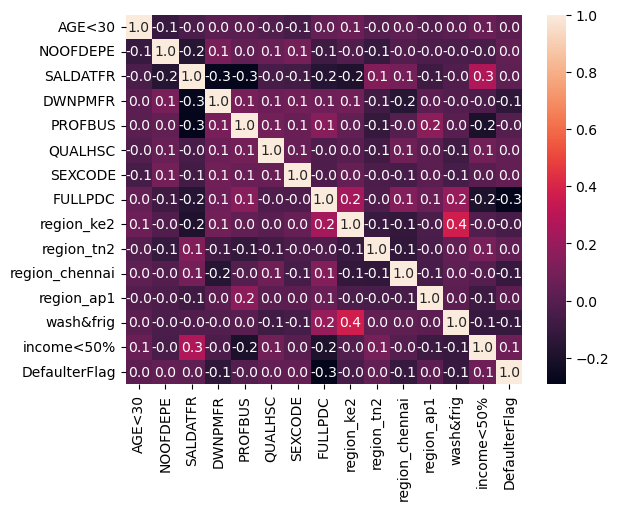

In [694]:
sns.heatmap(df[exogs+["DefaulterFlag"]].corr(), annot=True,fmt='.1f')


In [738]:
(X_train, y_train, X_test, y_test) = get_dataset(df, exoglist=exogs, endogstr="DefaulterFlag", random=1)


In [696]:
full_logit_model = Logit(endog=y_train , exog=X_train)

In [697]:
full_logit_result = full_logit_model.fit()
full_logit_result.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:          DefaulterFlag
Method:                          dydx
At:                           overall
==================================================================================
                    dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
AGE<30             0.0633      0.006      9.872      0.000       0.051       0.076
NOOFDEPE           0.0217      0.002     12.520      0.000       0.018       0.025
SALDATFR           0.0325      0.007      4.945      0.000       0.020       0.045
DWNPMFR           -0.1855      0.017    -10.994      0.000      -0.219      -0.152
PROFBUS            0.0632      0.008      7.472      0.000       0.047       0.080
QUALHSC            0.0445      0.007      6.292      0.000       0.031       0.058
SEXCODE            0.2055      0.008     26.347      0.000       0.190       0.221
FULLPDC           -0.2018      0.006    -36.334      0.000      -0.213      -0.191
region_ke2         0.0545      0.011      4.857      0.000       0.032       0.076
region_tn2         0.0710      0.011      6.587      0.000       0.050       0.092
region_chennai    -0.0683      0.008     -8.133      0.000      -0.085      -0.052
region_ap1         0.1210      0.024      4.979      0.000       0.073       0.169
wash&frig         -0.0385      0.008     -4.811      0.000      -0.054      -0.023
income<50%         0.0443      0.006      7.336      0.000       0.032       0.056
==================================================================================
"""

In [698]:
full_logit_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          DefaulterFlag   No. Observations:                23124
Model:                          Logit   Df Residuals:                    23110
Method:                           MLE   Df Model:                           13
Date:                Sun, 21 Jan 2024   Pseudo R-squ.:                 0.07072
Time:                        18:16:28   Log-Likelihood:                -12905.
converged:                       True   LL-Null:                       -13887.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
AGE<30             0.3373      0.034      9.807      0.000       0.270       0.405
NOOFDEPE           0.1157      0.009     12.387      0.000       0.097       0.134
SALDATFR           0.1731      0.035      4.937      0.000       0.104       0.242
DWNPMFR           -0.9877      0.091    -10.903      0.000      -1.165      -0.810
PROFBUS            0.3365      0.045      7.441      0.000       0.248       0.425
QUALHSC            0.2370      0.038      6.275      0.000       0.163       0.311
SEXCODE            1.0943      0.044     25.038      0.000       1.009       1.180
FULLPDC           -1.0748      0.032    -33.265      0.000      -1.138      -1.012
region_ke2         0.2901      0.060      4.848      0.000       0.173       0.407
region_tn2         0.3780      0.058      6.568      0.000       0.265       0.491
region_chennai    -0.3639      0.045     -8.094      0.000      -0.452      -0.276
region_ap1         0.6445      0.130      4.970      0.000       0.390       0.899
wash&frig         -0.2048      0.043     -4.803      0.000      -0.288      -0.121
income<50%         0.2362      0.032      7.308      0.000       0.173       0.299
==================================================================================
"""

In [699]:
params = full_logit_result.params
conf = full_logit_result.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                      5%       95%  Odds Ratio
AGE<30          1.309774  1.498799    1.401103
NOOFDEPE        1.102267  1.143361    1.122626
SALDATFR        1.110007  1.273538    1.188964
DWNPMFR         0.311839  0.444783    0.372425
PROFBUS         1.281313  1.529843    1.400074
QUALHSC         1.177002  1.364815    1.267435
SEXCODE         2.741850  3.254229    2.987074
FULLPDC         0.320404  0.363668    0.341351
region_ke2      1.188624  1.502811    1.336517
region_tn2      1.303667  1.633561    1.459322
region_chennai  0.636369  0.759001    0.694985
region_ap1      1.477542  2.456445    1.905125
wash&frig       0.749458  0.885828    0.814795
income<50%      1.188663  1.349179    1.266380


Confusion Matrix:
[[1114  552]
 [1464 2652]]

ROC AUC score: 0.7000338036089072

Accuracy Score: 0.6513317191283293
Precision: 0.8277153558052435
Recall: 0.6443148688046647
F1 Score: 0.7245901639344262


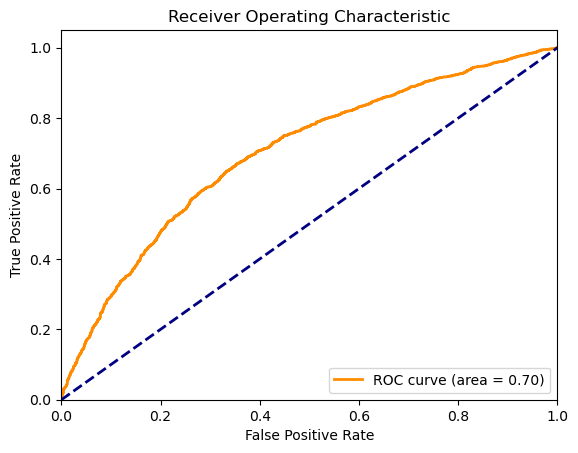

In [700]:
evaluate_model(df, "DefaulterFlag", full_logit_result, y_test, X_test)


In [707]:
thresholds = [i/100 for i in range(0, 100, 1)]

In [742]:
precs = []
recs = []
for threshold in thresholds:
    result = Logit(endog=y_train , exog=X_train).fit()
    prec, rec, conf = evaluate_model(df, "DefaulterFlag", result, y_test, X_test, threshold_ratio=threshold, print_=False)
    precs.append(prec)
    recs.append(rec)
    

Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
  

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.01'),
  Text(2, 0, '0.02'),
  Text(3, 0, '0.03'),
  Text(4, 0, '0.04'),
  Text(5, 0, '0.05'),
  Text(6, 0, '0.06'),
  Text(7, 0, '0.07'),
  Text(8, 0, '0.08'),
  Text(9, 0, '0.09'),
  Text(10, 0, '0.1'),
  Text(11, 0, '0.11'),
  Text(12, 0, '0.12'),
  Text(13, 0, '0.13'),
  Text(14, 0, '0.14'),
  Text(15, 0, '0.15'),
  Text(16, 0, '0.16'),
  Text(17, 0, '0.17'),
  Text(18, 0, '0.18'),
  Text(19, 0, '0.19'),
  Text(20, 0, '0.2'),
  Text(21, 0, '0.21'),
  Text(22, 0, '0.22'),
  Text(23, 0, '0.23'),
  Text(24, 

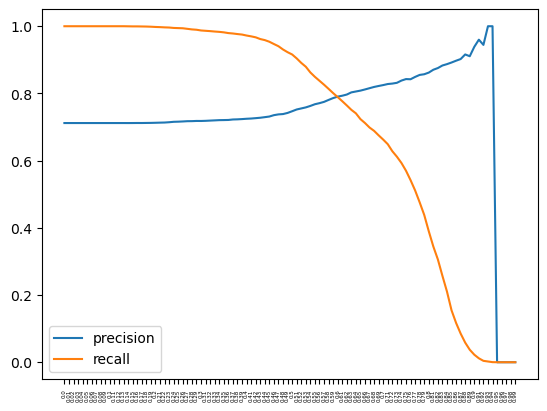

In [717]:
plt.plot(precs, label="precision")
plt.plot(recs, label="recall")
plt.legend()
plt.xticks([i for i in range(len(thresholds))], thresholds)
plt.xticks(rotation=90)
plt.xticks(fontsize=4)

<Axes: >

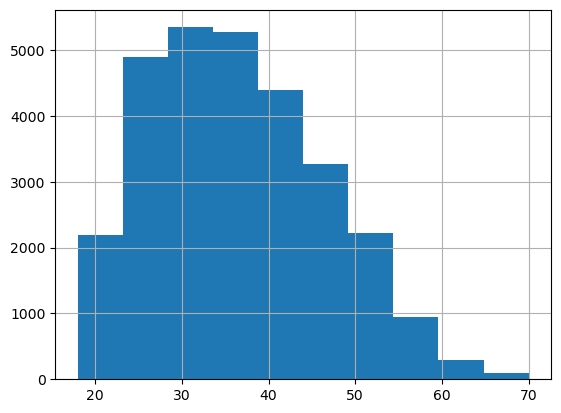

In [446]:
df["AGE"].hist()

<Axes: xlabel='AGE', ylabel='DefaulterFlag'>

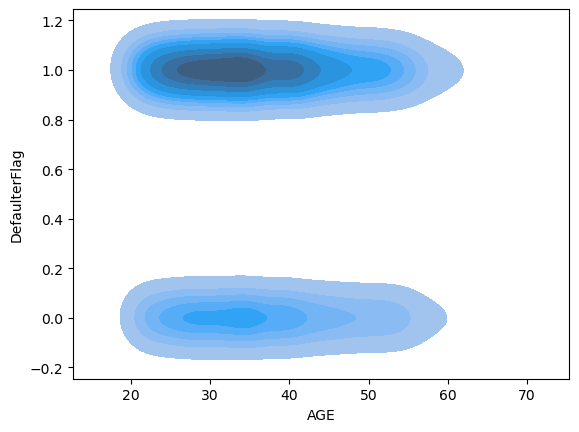

In [447]:
sns.kdeplot(x=df['AGE'], y=df['DefaulterFlag'], fill=True)

<Axes: xlabel='SEXCODE', ylabel='DefaulterFlag'>

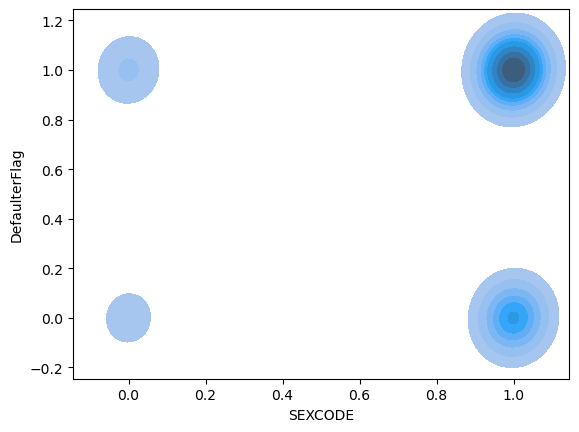

In [448]:
sns.kdeplot(x=df['SEXCODE'], y=df['DefaulterFlag'], fill=True)

<Axes: xlabel='AGE<30', ylabel='DefaulterFlag'>

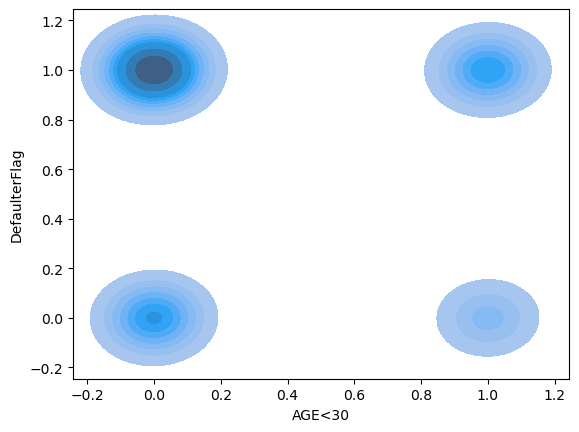

In [450]:
sns.kdeplot(x=df['AGE<30'], y=df['DefaulterFlag'], fill=True)


<Axes: xlabel='NOOFDEPE', ylabel='DefaulterFlag'>

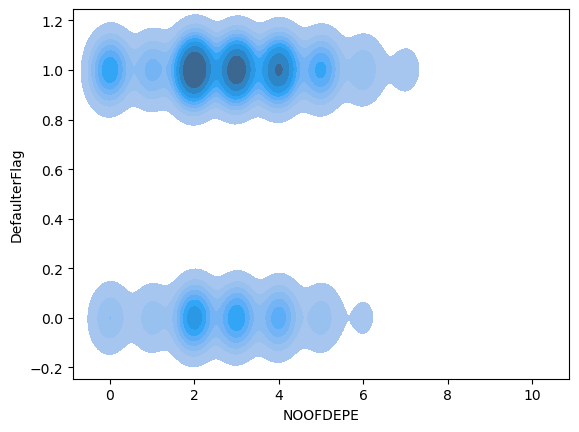

In [481]:
sns.kdeplot(x=df['NOOFDEPE'], y=df['DefaulterFlag'], fill=True)


In [573]:
df[["income<95%", "income>95%"]].corr()

,income<95%,income>95%
income<95%,1.0,-1.0
income>95%,-1.0,1.0


In [614]:
df["income>10%"].value_counts()

income>10%
1    25796
0     3110
Name: count, dtype: int64

<Axes: xlabel='MTHINCTH', ylabel='DefaulterFlag'>

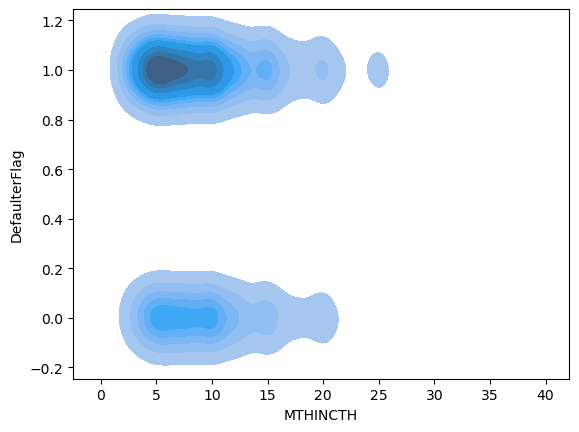

In [651]:
sns.kdeplot(x=df['MTHINCTH'], y=df['DefaulterFlag'], fill=True)



In [669]:
logit_model = Logit(endog=y_train , exog=X_train["income<95%"])
logit_result = logit_model.fit()
logit_result.get_margeff(at="zero").summary()

Optimization terminated successfully.
         Current function value: 0.601798
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:          DefaulterFlag
Method:                          dydx
At:                              zero
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
income<95%     0.2310      0.004     61.713      0.000       0.224       0.238
==============================================================================
"""

In [668]:
logit_model = Logit(endog=y_train , exog=X_train["income>95%"])
logit_result = logit_model.fit()
logit_result.get_margeff(at="zero").summary()

Optimization terminated successfully.
         Current function value: 0.691198
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:          DefaulterFlag
Method:                          dydx
At:                              zero
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
income>95%     0.1405      0.015      9.310      0.000       0.111       0.170
==============================================================================
"""

In [721]:
df["DefaulterType"].value_counts()/8332

DefaulterType
1    1.999880
0    1.000000
2    0.469395
Name: count, dtype: float64

In [723]:
pred = full_logit_result.predict(X_test)

In [732]:
predicted_df = X_test
predicted_df["prob_def"] = pred
predicted_df = predicted_df.sort_index()
predicted_df["DefaulterType"] = df[df.index.isin(X_test.index)]["DefaulterType"].to_list()


In [733]:
predicted_df

,AGE<30,NOOFDEPE,SALDATFR,DWNPMFR,PROFBUS,QUALHSC,SEXCODE,FULLPDC,region_ke2,region_tn2,region_chennai,region_ap1,wash&frig,income<50%,prob_def,DefaulterType
2,0,2,1.00,0.51,0,0,1,1,0,0,0,0,1,0,0.429306,0
14,1,0,1.00,0.28,0,0,1,0,0,0,0,0,0,0,0.790522,0
15,0,0,1.00,0.08,0,0,1,1,0,0,0,0,0,1,0.586539,0
18,0,2,1.00,0.29,0,0,1,1,0,0,0,0,1,1,0.542095,0
20,0,1,1.00,0.63,0,0,1,0,0,0,0,0,0,1,0.730458,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28886,0,0,0.17,0.41,1,1,1,0,0,0,0,0,0,0,0.784532,1
28887,1,0,0.17,0.39,1,1,1,1,0,0,0,0,0,0,0.639788,1
28889,0,0,0.17,0.57,1,1,1,1,0,0,0,0,0,0,0.514844,0
28898,1,0,0.17,0.41,1,0,1,1,0,0,0,0,0,0,0.578762,1


In [784]:
precss = []
recss = []
Pgbss = []
Pbgss = []
costss = []
opt_thrs = []
opt_thr = 0
min_cost = 1
randoms = [i for i in range(0,30)]
for r in randoms:
    get_dataset(df, exoglist=exogs, endogstr="DefaulterFlag", random=r)
    precs = []
    recs = []
    Pgbs = []
    Pbgs = []
    costs = []
    for threshold in thresholds:
        result = Logit(endog=y_train , exog=X_train).fit()
        prec, rec, conf = evaluate_model(df, "DefaulterFlag", result, y_test, X_test, threshold_ratio=threshold, print_=False)
        precs.append(prec)
        recs.append(rec)
        Pgb = conf[0][1]/(conf[0][1]+conf[1][1])
        Pbg = conf[1][0]/(conf[1][0]+conf[0][0])
        Pgbs.append(Pgb)
        Pbgs.append(Pbg)
        cost = Pgb*0.2544 + Pbg
        costs.append(cost)
        if cost<min_cost:
            min_cost = cost
            opt_thr = threshold
    opt_thrs.append(opt_thr)
    min_cost = 1
    precss.append(precs)
    recss.append(recs)
    Pgbss.append(Pgbs)
    Pbgss.append(Pbgs)
    costss.append(costs)
        

Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
  

cost minimizing threshold is 0.26


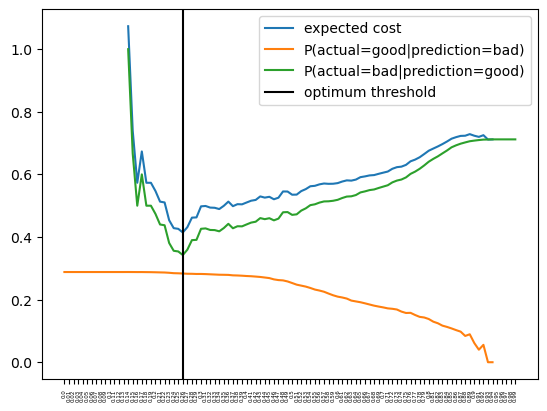

In [782]:
plt.plot(costs, label="expected cost")
plt.plot(Pgbs, label="P(actual=good|prediction=bad)")
plt.plot(Pbgs, label="P(actual=bad|prediction=good)")
plt.axvline(x = opt_thr*100, color="black",label = 'optimum threshold')
plt.legend()
plt.xticks([i for i in range(len(thresholds))], thresholds)
plt.xticks(rotation=90)
plt.xticks(fontsize=4)
print(f"cost minimizing threshold is {opt_thr}")

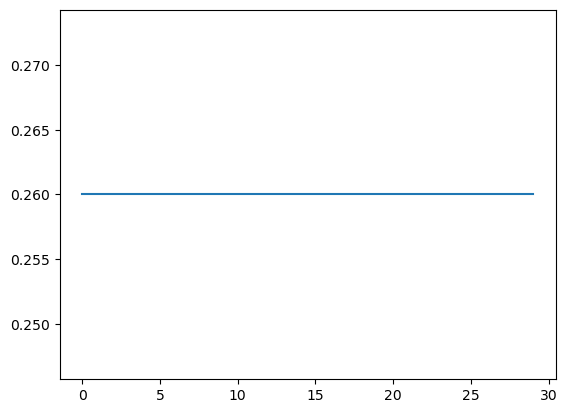

In [786]:
plt.plot(opt_thrs)

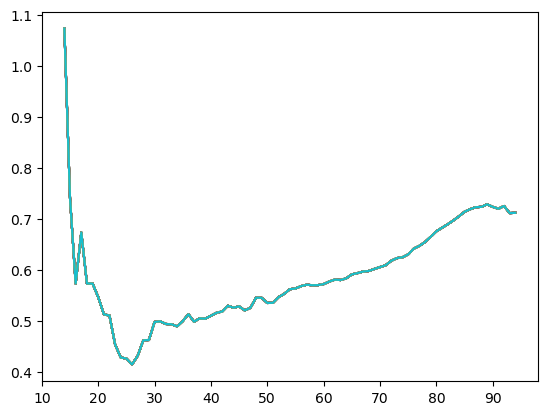

In [787]:
for i in costss:
    plt.plot(i)

In [799]:
precss = []
recss = []
Pgbss = []
Pbgss = []
costss = []
opt_thrs = []
opt_thr = 0
min_cost = 1
randoms = [1,2,3]
q = [i/100 for i in range(1,101, 2)]
for i in q:
    precs = []
    recs = []
    Pgbs = []
    Pbgs = []
    costs = []
    for threshold in thresholds:
        result = Logit(endog=y_train , exog=X_train).fit()
        prec, rec, conf = evaluate_model(df, "DefaulterFlag", result, y_test, X_test, threshold_ratio=threshold, print_=False)
        precs.append(prec)
        recs.append(rec)
        Pgb = conf[0][1]/(conf[0][1]+conf[1][1])
        Pbg = conf[1][0]/(conf[1][0]+conf[0][0])
        Pgbs.append(Pgb)
        Pbgs.append(Pbg)
        cost = Pgb*0.2544 + Pbg*i
        costs.append(cost)
        if cost<min_cost:
            min_cost = cost
            opt_thr = threshold
    opt_thrs.append(opt_thr)
    min_cost = 1
    precss.append(precs)
    recss.append(recs)
    Pgbss.append(Pgbs)
    Pbgss.append(Pbgs)
    costss.append(costs)

Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558090
  

Text(0.5, 0, 'fraction of capital defaulted')

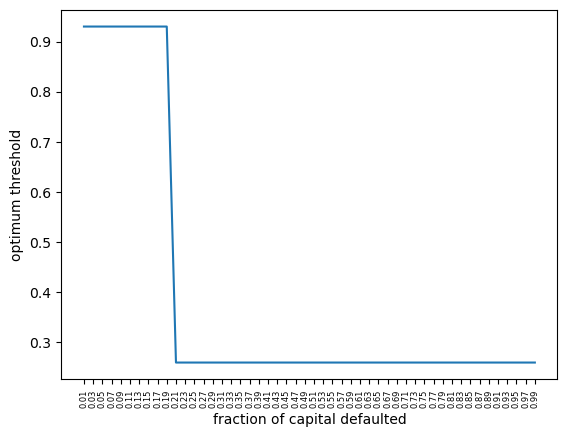

In [803]:
plt.plot(opt_thrs)
plt.xticks([i for i in range(len(q))], q)
plt.xticks(rotation=90)
plt.xticks(fontsize=6)
plt.ylabel("optimum threshold")
plt.xlabel("fraction of capital defaulted")

In [805]:
opt_thrs

[0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.93,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26,
 0.26]

In [810]:
df.columns

Index(['Agmt No', 'Contract Status', 'Start_Date', 'AGE', 'NOOFDEPE',
       'MTHINCTH', 'SALDATFR', 'TENORYR', 'DWNPMFR', 'PROFBUS', 'QUALHSC',
       'QUAL_PG', 'SEXCODE', 'FULLPDC', 'FRICODE', 'WASHCODE', 'Region',
       'Branch', 'DefaulterFlag', 'DefaulterType', 'DATASET',
       'contract_closed', 'contract_forclosed', 'contract_seized',
       'contract_live', 'region_ap2', 'region_ka1', 'region_ke2', 'region_tn2',
       'region_tn1', 'region_chennai', 'region_ap1', 'region_vellore',
       'branch_vizag', 'branch_vijayawada', 'branch_bangalore',
       'branch_ernakulam', 'branch_coimbattore', 'branch_kumbakonam',
       'branch_chennai', 'branch_madurai', 'branch_pondy', 'branch_salem',
       'branch_tiruchy', 'branch_tirupathi', 'branch_vellore',
       'branch_tirunelvelli', 'unknown_start_date', 'wash&frig', 'income>mean',
       'income>80%', 'income<20%', 'income>90%', 'income>95%', 'education',
       'income<30%', 'income<40%', 'income<10%', 'income<45%', 'income<50%

In [895]:
exogs = ['AGE','NOOFDEPE',
'SALDATFR', 'PROFBUS', 
'SEXCODE', 'FULLPDC',  
'education',
"wash&frig", "MTHINCTH"
]

In [896]:
(X_train, y_train, X_test, y_test) = get_dataset(df, exoglist=exogs, endogstr="DefaulterType", random=1)
ordered_model = OrderedModel(endog=y_train, exog=X_train, distr="logit")


In [897]:
ordered_result = ordered_model.fit()

In [898]:
ordered_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:          DefaulterType   Log-Likelihood:                -21413.
Model:                   OrderedModel   AIC:                         4.285e+04
Method:            Maximum Likelihood   BIC:                         4.294e+04
Date:                Wed, 24 Jan 2024                                         
Time:                        21:08:34                                         
No. Observations:               23124                                         
Df Residuals:                   23113                                         
Df Model:                          11                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AGE           -0.0184      0.001    -13.731      0.000      -0.021      -0.016
NOOFDEPE      -0.0751      0.008     -9.134      0.000      -0.091      -0.059
SALDATFR       0.2620      0.031      8.539      0.000       0.202       0.322
PROFBUS        0.1250      0.038      3.287      0.001       0.050       0.200
SEXCODE        0.1234      0.049      2.495      0.013       0.026       0.220
FULLPDC       -0.1308      0.028     -4.659      0.000      -0.186      -0.076
education     -0.0842      0.027     -3.104      0.002      -0.137      -0.031
wash&frig     -0.0843      0.036     -2.374      0.018      -0.154      -0.015
MTHINCTH      -0.0479      0.003    -16.920      0.000      -0.053      -0.042
0/1           -2.1508      0.079    -27.347      0.000      -2.305      -1.997
1/2            1.0291      0.008    132.013      0.000       1.014       1.044
==============================================================================
"""

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

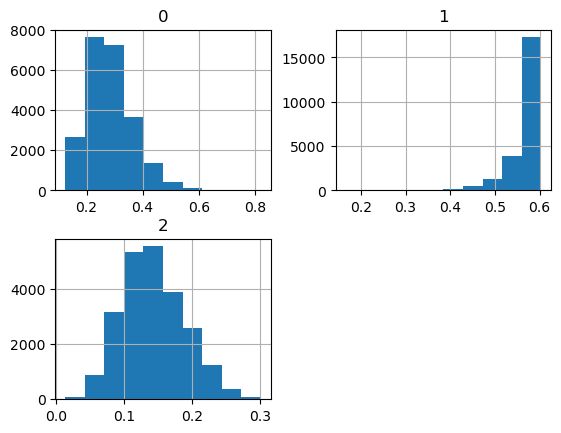

In [899]:
pd.DataFrame(ordered_result.predict()).hist()

In [900]:
ordered_pred = pd.DataFrame(ordered_result.predict())
ordered_pred["predicted_class"] = ordered_pred[[0,1,2]].idxmax(axis=1).to_list()

In [901]:
ordered_pred

,0,1,2,predicted_class
0,0.256868,0.593354,0.149778,1
1,0.333260,0.558145,0.108594,1
2,0.199922,0.604139,0.195938,1
3,0.190574,0.603943,0.205483,1
4,0.320062,0.565396,0.114541,1
...,...,...,...,...
23119,0.383222,0.527522,0.089255,1
23120,0.388167,0.524260,0.087573,1
23121,0.239698,0.598424,0.161878,1
23122,0.212515,0.603387,0.184098,1


<Axes: >

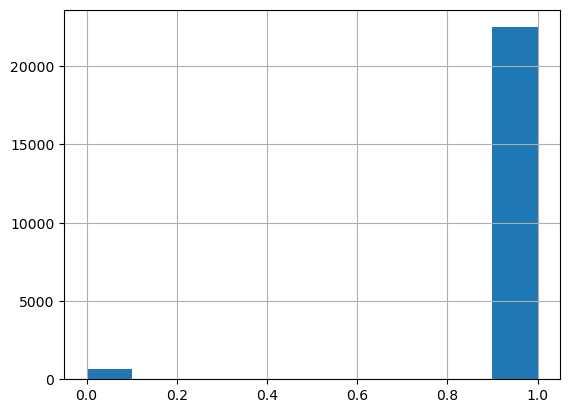

In [902]:
ordered_pred["predicted_class"].hist()

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

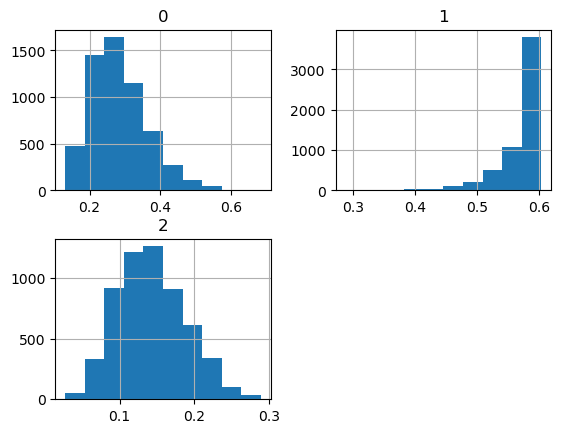

In [903]:
pd.DataFrame(ordered_result.predict(exog=X_test)).hist()

In [906]:
pd.concat([ordered_result.predict(exog=X_test), y_test], axis=1)

,0,1,2,DefaulterType
5709,0.210745,0.603558,0.185697,1
19107,0.239882,0.598377,0.161742,1
22035,0.333320,0.558112,0.108569,1
10018,0.318487,0.566235,0.115278,2
25652,0.346222,0.550653,0.103126,1
...,...,...,...,...
10552,0.219502,0.602517,0.177981,1
28554,0.184497,0.603432,0.212071,1
17121,0.216125,0.602975,0.180899,0
27624,0.174611,0.601885,0.223504,1


In [911]:
y_test.value_counts()/y_test.value_counts().sum()

DefaulterType
1    0.576444
0    0.288309
2    0.135247
Name: count, dtype: float64